In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [87]:
train_df=pd.read_excel("data\Titanic_Survival_Train.xls")
test_df=pd.read_excel("data\Titanic_Survival_Test.xls")

In [88]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S
1,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
2,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
3,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
4,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C


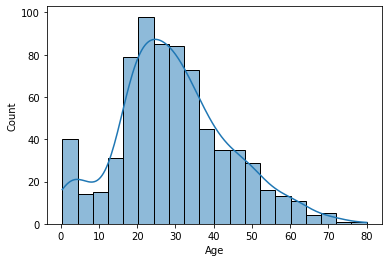

In [90]:
sns.histplot(data=train_df,x="Age",kde=True)
plt.show()

- the person between age group 20 to 35 are the majority
- children from 1 to 5 age is 40
- less senior citizen

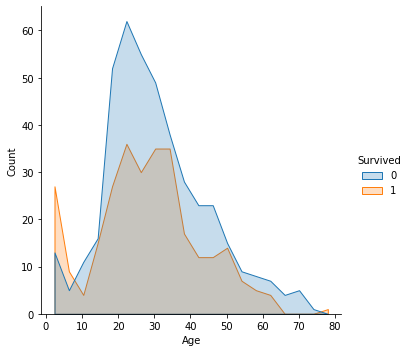

In [91]:
sns.displot(train_df,x="Age",hue="Survived",element="poly")
plt.show()

In [92]:
def create_piechart(data,column):
    """
    objective: create piechart for categorical variables present in the dataset
    params:
         data:this is pandas datarame
         column:this is column name which is use to create plot
      
     return:This will show piechart
    """
    labels=list(data[column].value_counts().to_dict().keys())
    sizes=list(data[column].value_counts().to_dict().values())
    plt.pie(sizes,labels=labels,autopct='%1.2f%%',shadow=False,startangle=45)
    plt.axis('equal')
    plt.title("piechart - {}".format(column))
    plt.show()

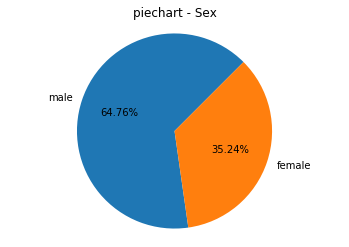

In [93]:
create_piechart(train_df, "Sex")

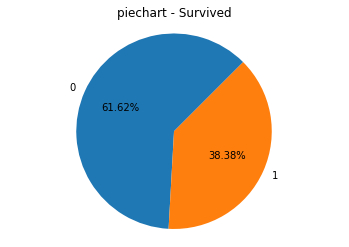

In [94]:
create_piechart(train_df, "Survived")

In [95]:
def missing_data(data):
    """
    objective: check missing value count and percentage in all columns
    data:input data frame
    return:Missing value data frame
    """
    total=data.isnull().sum().sort_values(ascending=False)
    percent=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1,keys=["total","percent"])
    return missing_data

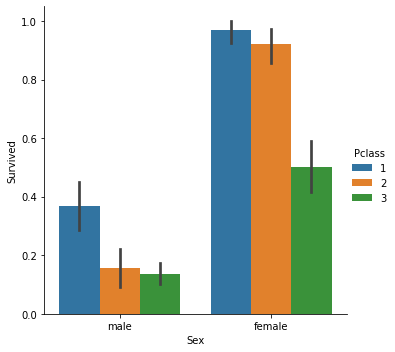

In [96]:
sns.catplot(data=train_df,x="Sex",y="Survived",hue="Pclass",kind="bar")
plt.show()

- the bigger the line less is the confidence and vice versa hence even the males of the first class have less survival rate then female of the 3rd class

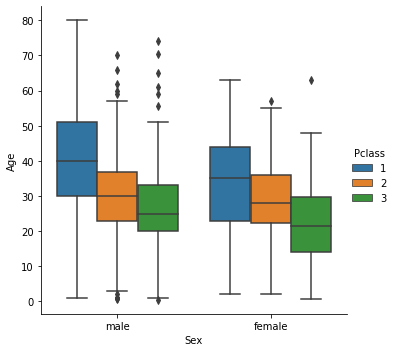

In [97]:
sns.catplot(data=train_df,x="Sex",y="Age",hue="Pclass",kind="box")
plt.show()

- it shows that the older people are mostly travelling in the first class and then the middle age people in the second class and the youngest people in the 3rd class 
- but some of the older people are travelling in the second and third class resulting in outlier

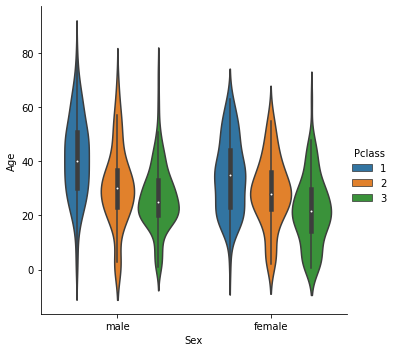

In [98]:
sns.catplot(data=train_df,x="Sex",y="Age",hue="Pclass",kind="violin")
plt.show()

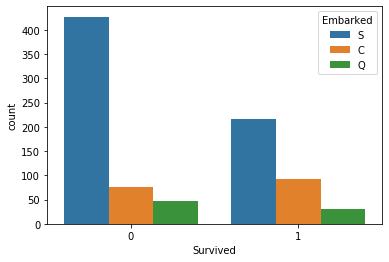

In [99]:
sns.countplot(data=train_df,x="Survived",hue="Embarked")
plt.show()

- this shows that the people embarked from s location survived more than other people but gradually it is wrong as most of the people embarked from singapore and rest others were small islands so in this domain understanding will help

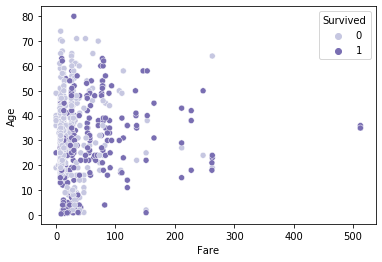

In [100]:
sns.scatterplot(data=train_df,y="Age",x="Fare",hue="Survived",palette="Purples")
plt.show()

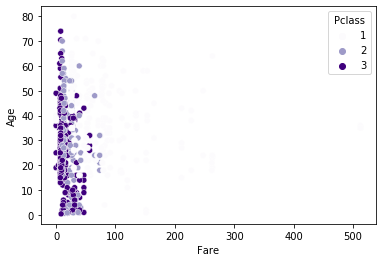

In [101]:
sns.scatterplot(data=train_df,y="Age",x="Fare",hue="Pclass",palette="Purples")
plt.show()

In [102]:
train_df=train_df[['Name','Pclass','Sex','Age','Survived']]
test_df=test_df[['Name','Pclass','Sex','Age','Survived']]

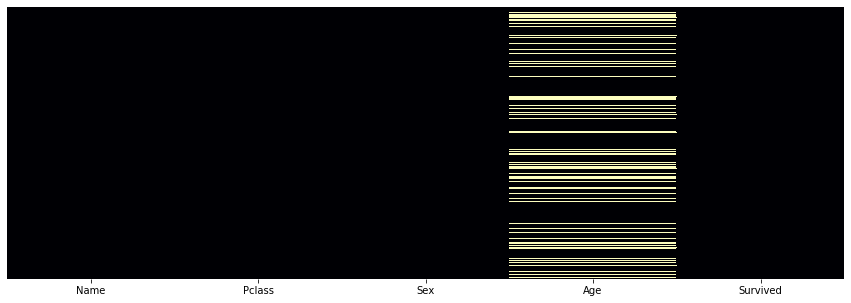

In [103]:
plt.figure(figsize=(15,5))
sns.heatmap(train_df.isnull(),cbar=False,yticklabels=False,cmap="magma")
plt.show()

In [104]:
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())

Name          0
Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

Name        0
Pclass      0
Sex         0
Age         2
Survived    0
dtype: int64


In [105]:
train_df["Age"].fillna(train_df["Age"].mean(),inplace=True)
test_df["Age"].fillna(test_df["Age"].mean(),inplace=True)


In [106]:
train_df["Age"].isnull().sum()

0

In [107]:
train_df["Sex"]=train_df["Sex"].map({"male":0,"female":1})
test_df["Sex"]=test_df["Sex"].map({"male":0,"female":1})

In [108]:
train_df.head()

,Name,Pclass,Sex,Age,Survived
0,"Braund, Mr. Owen Harris",3,0,22.0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,38.0,1
2,"Heikkinen, Miss. Laina",3,1,26.0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,35.0,1
4,"Allen, Mr. William Henry",3,0,35.0,0


In [109]:
X_train=train_df.values[:870,1:-1]
y_train=train_df.values[:870,-1]
y_train=y_train.astype(int)

X_test=test_df.values[:,1:-1]
y_test=test_df.values[:,-1]
y_test=y_test.astype(int)

In [110]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

X_train_scale

array([[ 8.28102044e-01, -7.34726486e-01, -5.89320802e-01],
       [-1.56541549e+00,  1.36105070e+00,  6.35879178e-01],
       [ 8.28102044e-01,  1.36105070e+00, -2.83020807e-01],
       ...,
       [-1.56541549e+00, -7.34726486e-01,  9.98541867e-02],
       [ 8.28102044e-01, -7.34726486e-01,  2.39122131e-04],
       [ 8.28102044e-01, -7.34726486e-01, -1.96767078e+00]])

In [111]:
X_test_scale

array([[ 0.82810204, -0.73472649, -0.28302081],
       [-1.56541549,  1.3610507 ,  1.32505417],
       [-1.56541549, -0.73472649,  0.25300418],
       [ 0.82810204, -0.73472649,  1.32505417],
       [-0.36865672,  1.3610507 , -0.12987081],
       [ 0.82810204,  1.3610507 , -1.12534579],
       [ 0.82810204, -0.73472649, -0.7424708 ],
       [ 0.82810204, -0.73472649, -0.8190458 ],
       [ 0.82810204, -0.73472649,  0.0111884 ],
       [-1.56541549,  1.3610507 ,  2.01422916],
       [-0.36865672,  1.3610507 , -0.35959581],
       [ 0.82810204, -0.73472649,  0.25300418],
       [ 0.82810204,  1.3610507 , -0.5893208 ],
       [-0.36865672, -0.73472649, -0.12987081],
       [ 0.82810204, -0.73472649, -0.35959581],
       [ 0.82810204,  1.3610507 ,  0.71245418],
       [-0.36865672, -0.73472649, -0.20644581],
       [-1.56541549,  1.3610507 , -0.8190458 ],
       [ 0.82810204,  1.3610507 ,  0.0111884 ],
       [-1.56541549, -0.73472649, -0.28302081],
       [ 0.82810204, -0.73472649,  0.176

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
%%time
classifier=LogisticRegression()
classifier.fit(X_train_scale,y_train)
y_pred=classifier.predict(X_test_scale)
print(list(zip(y_test,y_pred)))

[(0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0)]
Wall time: 223 ms


In [114]:
print(list(zip(train_df.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)

[('Name', -0.9378296019962338), ('Pclass', 1.2267456843653435), ('Sex', -0.41823568057283245)]
[-0.63263136]


In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm =confusion_matrix(y_test,y_pred)

print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[12  2]
 [ 0  7]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.78      1.00      0.88         7

    accuracy                           0.90        21
   macro avg       0.89      0.93      0.90        21
weighted avg       0.93      0.90      0.91        21

Accuracy of the model:  0.9047619047619048


In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
model_KNN=KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train_scale,y_train)
y_pred=model_KNN.predict(X_test_scale)

In [119]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [120]:
y_test

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm =confusion_matrix(y_test,y_pred)

print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[11  3]
 [ 0  7]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.70      1.00      0.82         7

    accuracy                           0.86        21
   macro avg       0.85      0.89      0.85        21
weighted avg       0.90      0.86      0.86        21

Accuracy of the model:  0.8571428571428571


In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm =confusion_matrix(y_train,y_pred_train)

print(cfm)

print("Classification report: ")

print(classification_report(y_train,y_pred_train))

acc=accuracy_score(y_train, y_pred_train)
print("Accuracy of the model: ",acc)

NameError: name 'y_train' is not defined

In [159]:
acc_dict = dict()

for K in range(3,31):
    model_KNN=KNeighborsClassifier(K,metric='euclidean')
    model_KNN.fit(X_train_scale, y_train)
    y_pred= model_KNN.predict(X_test_scale)
    acc_score= round(accuracy_score(y_test, y_pred),2)
    print("Accuracy is: {} for K-Value: {}".format(acc_score,K))
    acc_dict[K]=acc_score


Accuracy is: 0.86 for K-Value: 3
Accuracy is: 0.9 for K-Value: 4
Accuracy is: 0.9 for K-Value: 5
Accuracy is: 0.9 for K-Value: 6
Accuracy is: 0.86 for K-Value: 7
Accuracy is: 0.86 for K-Value: 8
Accuracy is: 0.81 for K-Value: 9
Accuracy is: 0.9 for K-Value: 10
Accuracy is: 0.81 for K-Value: 11
Accuracy is: 0.9 for K-Value: 12
Accuracy is: 0.86 for K-Value: 13
Accuracy is: 0.9 for K-Value: 14
Accuracy is: 0.86 for K-Value: 15
Accuracy is: 0.86 for K-Value: 16
Accuracy is: 0.86 for K-Value: 17
Accuracy is: 0.86 for K-Value: 18
Accuracy is: 0.81 for K-Value: 19
Accuracy is: 0.86 for K-Value: 20
Accuracy is: 0.81 for K-Value: 21
Accuracy is: 0.81 for K-Value: 22
Accuracy is: 0.86 for K-Value: 23
Accuracy is: 0.81 for K-Value: 24
Accuracy is: 0.81 for K-Value: 25
Accuracy is: 0.86 for K-Value: 26
Accuracy is: 0.86 for K-Value: 27
Accuracy is: 0.86 for K-Value: 28
Accuracy is: 0.86 for K-Value: 29
Accuracy is: 0.86 for K-Value: 30


In [160]:
for k in acc_dict:
    if acc_dict[k]==max(acc_dict.values()):
        print(k,":",acc_dict[k])

4 : 0.9
5 : 0.9
6 : 0.9
10 : 0.9
12 : 0.9
14 : 0.9


In [166]:
model=KNeighborsClassifier(n_neighbors=5,metric='euclidean',n_jobs=-1)
model.fit(X_train_scale,y_train)
y_pred=model.predict(X_test_scale)

In [167]:
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)
print()

print("Classification report: ")
print(classification_report(y_test,y_pred))
acc_score=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc_score)

[[12  2]
 [ 0  7]]

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.78      1.00      0.88         7

    accuracy                           0.90        21
   macro avg       0.89      0.93      0.90        21
weighted avg       0.93      0.90      0.91        21

Accuracy of the model:  0.9047619047619048


In [171]:
model=KNeighborsClassifier(n_neighbors=5,metric='euclidean',n_jobs=-1)
model.fit(X_train_scale,y_train)
y_pred_train=model.predict(X_train_scale)

In [172]:
conf_matrix=confusion_matrix(y_train,y_pred_train)
print(conf_matrix)
print()

print("Classification report: ")
print(classification_report(y_train,y_pred_train))
acc_score=accuracy_score(y_train,y_pred_train)
print("Accuracy of the model: ",acc_score)

[[486  49]
 [ 84 251]]

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       535
           1       0.84      0.75      0.79       335

    accuracy                           0.85       870
   macro avg       0.84      0.83      0.84       870
weighted avg       0.85      0.85      0.85       870

Accuracy of the model:  0.8471264367816091
